In [14]:
# Dependencies
import pandas as pd
import numpy as np

In [15]:
# Load data (FRED-MD)
df = pd.read_csv(
    'current.csv',
)
transformation_codes = df.iloc[0]
df = df.iloc[1:]  # Remove the first row (codes)
# Parse data
df.index = pd.to_datetime(df.iloc[:, 0])
data = df.iloc[:, 1:]  # Remove the first column (dates)

# Make the series stationary
def transform_series(series, code):
    if code == 1:
        return series  # No transformation
    elif code == 2:
        return series.diff().dropna()  # First difference
    elif code == 3:
        return series.diff().diff().dropna()  # Second difference
    elif code == 4:
        return np.log(series).dropna()  # Logarithm
    elif code == 5:
        return np.log(series).diff().dropna()  # First difference of logarithm
    elif code == 6:
        return np.log(series).diff().diff().dropna()  # Second difference of logarithm
    elif code == 7:
        return series.pct_change().dropna()  # Percentage change
    else:
        raise ValueError(f"Unknown transformation code: {code}")

transformed_data = {}

for column in data.columns:
    code = transformation_codes[column]
    transformed_data[column] = transform_series(data[column], code)

# Set index
data = pd.DataFrame(transformed_data).dropna()
target = data["CPIAUCSL"]
# Drop the target variable from the features
data = data.drop(columns=["CPIAUCSL"])
display(data)


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-03-01,0.001467,0.000590,0.001830,0.004017,-0.003001,0.008381,0.008338,0.008783,0.008871,0.020222,...,0.001291,-0.000182,0.000836,0.011670,-0.003556,7.2,-0.016313,0.001663,-0.003791,16.2227
1992-04-01,0.003587,0.002574,0.000833,0.006642,0.006017,0.007652,0.007433,0.007499,0.009322,0.018415,...,-0.002156,0.000792,0.000830,-0.005836,0.001759,1.2,0.037147,-0.005843,0.001367,16.1885
1992-05-01,0.005188,0.005346,0.005164,-0.008738,0.005467,0.003283,0.005520,0.005877,0.006537,0.030857,...,0.000964,-0.002580,-0.002514,-0.000726,-0.000890,2.0,-0.052941,0.000207,0.004045,14.7280
1992-06-01,0.004069,0.004316,0.002703,0.010487,0.002804,0.000564,-0.002470,-0.003155,-0.004910,-0.013889,...,0.003219,0.000265,0.002500,0.007957,-0.000883,1.2,0.045621,0.008812,-0.000894,14.7531
1992-07-01,-0.000888,-0.001450,0.003318,0.013303,0.007080,0.009022,0.010146,0.011477,0.013214,0.026242,...,-0.002373,0.002632,-0.004169,-0.015187,-0.000003,-3.8,-0.003523,-0.008544,0.002273,13.3036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,0.000551,0.000025,0.001363,0.004770,-0.002785,0.002654,0.004202,0.003526,0.005423,-0.001019,...,-0.001163,0.000954,0.000956,0.001403,0.001427,-0.9,-0.004221,-0.003046,0.009716,12.6826
2024-07-01,0.001320,0.000871,0.004333,0.007163,0.012031,-0.007136,-0.007462,-0.008259,-0.010192,-0.058491,...,0.003849,0.000041,0.000303,0.000271,0.001048,-1.8,0.003282,0.004003,-0.004194,14.4084
2024-08-01,0.000950,0.000968,0.000711,0.000375,-0.001144,0.004810,0.004447,0.006822,0.008385,0.046971,...,-0.002222,-0.000061,-0.002576,-0.000291,-0.005741,1.5,-0.001974,-0.000766,0.001445,19.6750


In [16]:
from sklearn.decomposition import PCA

# Apply PCA to the data
# pca = PCA(n_components=0.90)
# pca.fit(data)
# data = pca.transform(data)

In [17]:
# Prepare data for the LSTM

# Convert data into sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 12  # Have one year of context
X, y = create_sequences(data, target.values, time_steps)

# # Split into train and test
split = len(X) - 6 # Last quarter for test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [18]:
# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

# Create model
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(units=1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=1)

# Evaluate
model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50


/home/js/macroeconvue/modeling/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2176
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1265
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1124
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0976
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0766
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0668
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0615
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0699
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0629
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0602
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0360
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0360
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286
Epoch 16/50
12/12 ━━━━━━━━━━━

0.0003222885716240853

In [19]:
# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(train_pred.shape, test_pred.shape)
# Set the index
train_pred = pd.Series(train_pred.flatten(), index=target.index[:split])
test_pred = pd.Series(test_pred.flatten(), index=target.index[-6:])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(372, 1) (6, 1)


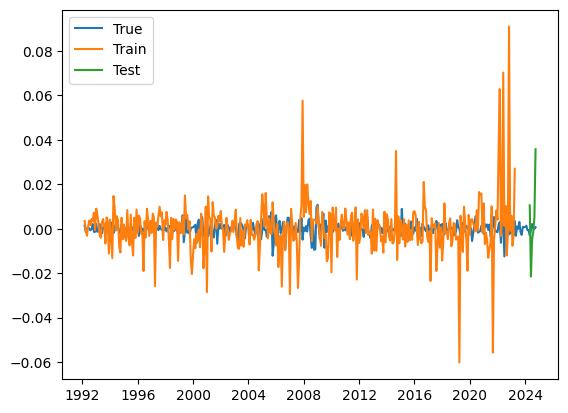

In [20]:
# Generate predictions and plot
import matplotlib.pyplot as plt

# Plot
plt.plot(target, label='True')
plt.plot(train_pred, label='Train')
plt.plot(test_pred, label='Test')
plt.legend()
plt.show()

In [21]:
df = pd.DataFrame({
    'True': y_test,
    'Predicted': test_pred
})
df.index = target.index[-6:]
df

,True,Predicted
sasdate,,
2024-05-01,-0.003067,0.010540
2024-06-01,-0.000620,-0.021497
2024-07-01,0.002110,-0.004896
2024-08-01,0.000322,-0.001564
2024-09-01,-0.000073,0.005239
2024-10-01,0.000641,0.035738


In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f'RMSE: {rmse}')

# With PCA   : RMSE: 0.08344137416293543
# Without PCA: RMSE: 0.01795239748262945

RMSE: 0.01795239748262945
